K-Nearest Neighbor

다양한 레이블의 데이터 중에서, 자신과 가까운 데이터를 찾아 자신의 레이블을 결정하는 방식


result : [[0.]]
neighbours : [[1. 0. 0.]]
distance : [[260. 288. 325.]]


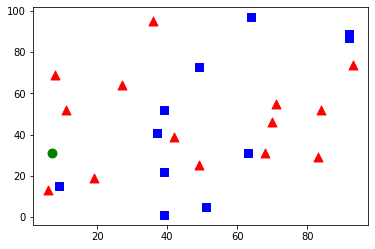

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 각 데이터의 위치: 25 X 2 크기에 각각 0 ~ 100
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)
# 각 데이터는 0 or 1
response = np.random.randint(0, 2, (25, 1)).astype(np.float32) 

# 값이 0인 데이터를 각각 (x, y)위치에 빨간색으로 칠함
red = trainData[response.ravel() == 0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')
# 값이 1인 데이터를 각각 (x, y)위치에 파란색으로 칠함
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치의 데이터를 하나 생성해 칠합니다.
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')


knn = cv2.ml.KNearest_create()     # KNN 객체 생성
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)     # KNN 초기화
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

# 가까운 3개를 찾고, 거리 고려하여 자신을 정하기
print("result :", results)
print("neighbours :", neighbours)
print("distance :", dist)